#Conhecendo o Dataset

## Importando bibliotecas

In [32]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## O Dataset e o Projeto

Utilizando um dataset disponível no Kaggle gerado para treinamento de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [33]:
dados = pd.read_csv('preco_imoveis.csv', sep = ';')

## Visualizar os dados

In [34]:
dados.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Verificando o tamanho do dataset

In [35]:
dados.shape

(1000, 7)

#Análises Preliminares

## Estatísticas descritivas

In [36]:
dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


## Matriz de correlação

In [37]:
dados.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


#Comportamento da Variável Dependente (Y)

# Análises gráficas

## Importando biblioteca seaborn

In [38]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

In [39]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

## Box plot da variável dependente (y)

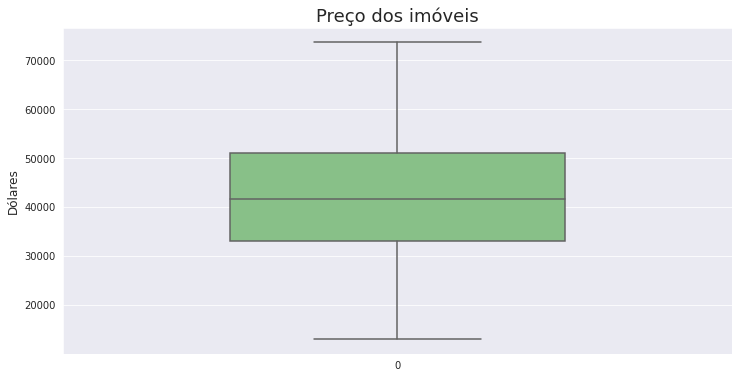

In [40]:
ax = sns.boxplot(data=dados['precos'], width = 0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço dos imóveis', fontsize = 18)
ax.set_ylabel('Dólares', fontsize = 12)
ax

## Investigando a variável dependente (y) 

### Box-plot (Preço X Garagem)

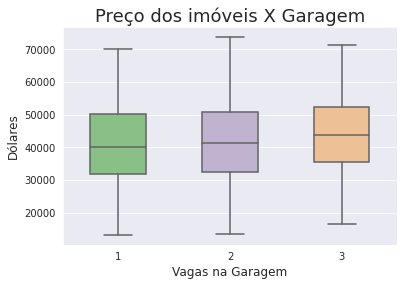

In [41]:
ax = sns.boxplot(x = 'garagem', y = 'precos', data = dados, orient = 'v', width = 0.5)
ax.set_title('Preço dos imóveis X Garagem', fontsize = 18)
ax.set_ylabel('Dólares', fontsize = 12)
ax. set_xlabel('Vagas na Garagem', fontsize = 12)
ax

### Box-plot (Preço X Banheiros)

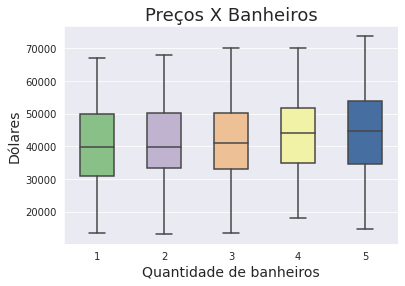

In [42]:
ax = sns.boxplot(x = 'banheiros', y = 'precos', data = dados, width = 0.5, orient = 'v')
ax.set_title('Preços X Banheiros', fontsize = 18)
ax.set_ylabel('Dólares', fontsize = 14)
ax.set_xlabel('Quantidade de banheiros', fontsize = 14)
ax

### Box-plot (Preço X Lareira)

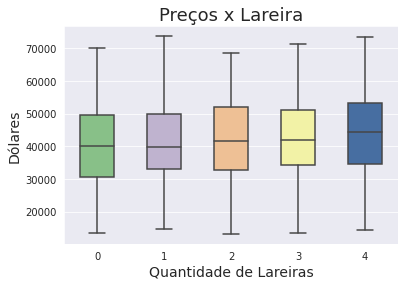

In [43]:
ax = sns.boxplot(x = 'lareira', y = 'precos', data = dados, orient = 'v', width = 0.5)
ax.set_title('Preços x Lareira', fontsize = 18)
ax.set_ylabel('Dólares', fontsize = 14)
ax.set_xlabel('Quantidade de Lareiras', fontsize = 14)
ax

### Box-plot (Preço X Acabamento em Mármore)

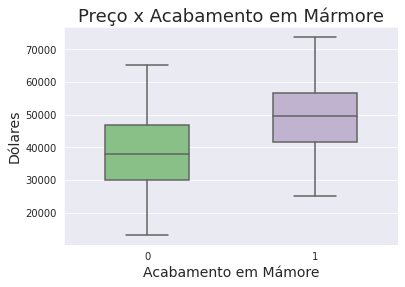

In [44]:
ax = sns.boxplot(x = 'marmore', y = 'precos', data = dados, orient = 'v', width = 0.5)
ax.set_title('Preço x Acabamento em Mármore', fontsize = 18)
ax.set_ylabel('Dólares', fontsize = 14)
ax.set_xlabel('Acabamento em Mámore', fontsize = 14)
ax

### Box-plot (Preço X Andares)

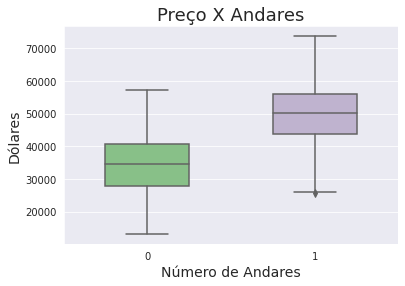

In [45]:
ax = sns.boxplot(x = 'andares', y = 'precos', data = dados, orient = 'v', width = 0.5)
ax.set_title('Preço X Andares', fontsize = 18)
ax.set_ylabel('Dólares', fontsize = 14)
ax.set_xlabel('Número de Andares', fontsize = 14)
ax

## Distribuição de frequências da variável dependente (y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


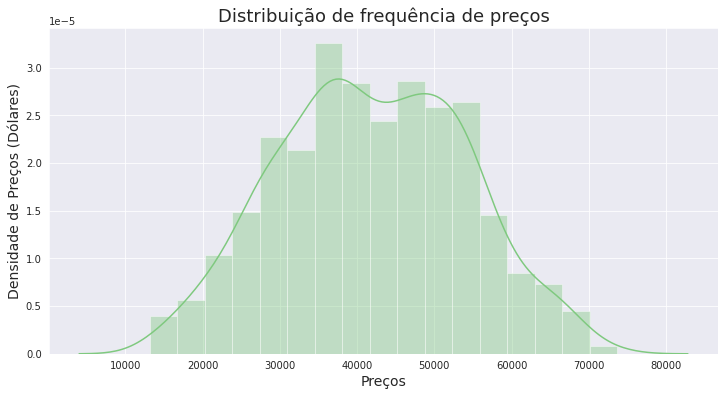

In [46]:
ax = sns.distplot(dados['precos'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência de preços', fontsize = 18)
ax.set_ylabel('Densidade de Preços (Dólares)', fontsize = 14)
ax.set_xlabel('Preços', fontsize = 14)
ax

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

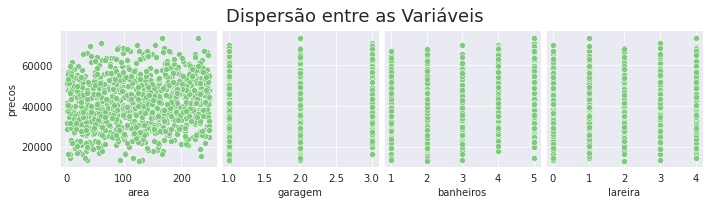

In [47]:
ax = sns.pairplot(dados, y_vars = 'precos', x_vars = ['area','garagem', 'banheiros', 'lareira'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize = 18, y = 1.1)
ax

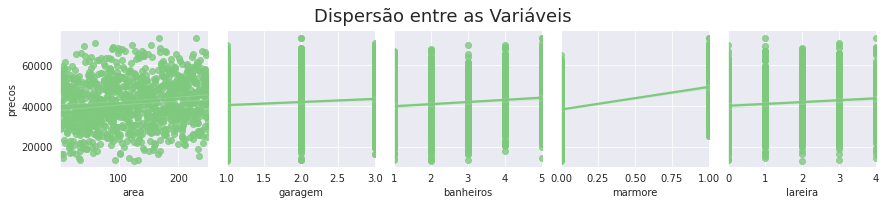

In [48]:
ax = sns.pairplot(y_vars = 'precos', x_vars = ['area','garagem', 'banheiros', 'marmore', 'lareira'], data = dados, kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize = 18, y = 1.1)
ax 

#Estimando um modelo de regressão linear

## Importando o train_test_split da biblioteca scikit-learn

In [49]:
from sklearn.model_selection import train_test_split

## Criando uma series para armazenar a variável dependente (y)

In [50]:
y = dados['precos']

## Criando um dataframe para armazenar as variáveis explicativas (X)

In [51]:
X = dados[['area','andares','garagem', 'banheiros', 'marmore', 'lareira']]

## Criando os datasets de treino e de teste

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 2811)

## Importando LinearRegression e metrics da biblioteca scikit-learn

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe LinearRegression()

In [54]:
modelo = LinearRegression()

## Utilizando o método fit() para estimar o modelo linear utilizando os dados de treino (y_train e X_train)

In [55]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de treino

In [56]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.64


## Gerando previsões para os dados de teste (X_test) utilizando o método predict()

In [57]:
previsao = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

In [58]:
print('R² = {}'.format(metrics.r2_score(y_test, previsao).round(2)))

R² = 0.67


#Obtendo previsões pontuais

## Criando um simulador simples

In [65]:
area = 200
andares = 1
garagem = 2
banheiros = 2
marmore = 1
lareira = 1
entrada = [[area, andares, garagem, banheiros, marmore, lareira]]

print('{0:.2f} dólares'.format(modelo.predict(entrada)[0]))

56941.10 dólares


## Obtendo métricas para o modelo com temperatura máxima

In [60]:
import numpy as np

EQM = metrics.mean_squared_error(y_test, previsao).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, previsao)).round(2)
R2 = metrics.r2_score(y_test, previsao).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R2'], columns = ['Métricas'])

,Métricas
EQM,50197019.50
REQM,7084.99
R2,0.67


#Salvando e Carregando o Modelo Estimado

## Importando a biblioteca pickle

In [61]:
import pickle

## Salvando o modelo estimado

In [62]:
output = open('modelo_preco', 'wb')
pickle.dump(modelo, output)
output.close()